Emotion Detection

In [1]:
import cv2
import matplotlib.pyplot as plt
import random
import os
from glob import glob
%matplotlib inline

import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator 
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D 
from keras.layers import BatchNormalization, Activation, MaxPooling2D 
from keras.models import Model, Sequential
from keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau 
from keras.utils import plot_model 

from IPython.display import SVG, Image

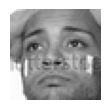

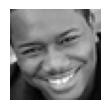

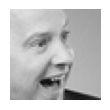

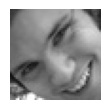

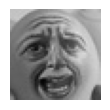

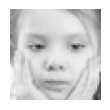

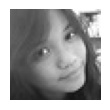

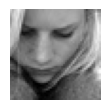

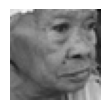

In [2]:
images=glob('train/**/**')
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(4,4))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    plt.axis('off')

In [3]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_set_generator=datagen_train.flow_from_directory("train/", 
                                                  target_size=(img_size, img_size), 
                                                  color_mode='grayscale', 
                                                  batch_size=batch_size, 
                                                  class_mode='categorical', shuffle=True)
datagen_validation=ImageDataGenerator()
validation_set_generator=datagen_validation.flow_from_directory("test/", 
                                                            target_size=(img_size, img_size), 
                                                            color_mode='grayscale', 
                                                            batch_size=batch_size, 
                                                            class_mode='categorical', shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x=Conv2D(filters=filters, kernel_size=kernel_size, padding='same')(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)

    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)

    return x

In [6]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs, 32, (3,3))
    conv_2=Convolution(inputs, 64, (5,5))
    conv_3=Convolution(inputs, 128, (3,3))
    flatten=Flatten()(conv_3)
    dense_1=Dense_f(flatten, 256)
    output=Dense(7, activation='softmax')(dense_1)
    model=Model(inputs=[inputs], outputs=[output])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [7]:
model=model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

In [8]:
epochs=15
steps_per_epoch=train_set_generator.n//train_set_generator.batch_size
validation_steps=validation_set_generator.n//validation_set_generator.batch_size
checkpoint=ModelCheckpoint('model_weight.weights.h5', 
                           monitor='val_accuracy', 
                           save_weights_only=True, 
                           mode='max', verbose=1) 
callbacks=[checkpoint]

In [9]:
history=model.fit(x=train_set_generator, 
                  steps_per_epoch=steps_per_epoch-1, 
                  epochs=epochs, 
                  validation_data=validation_set_generator, 
                  validation_steps=validation_steps, 
                  callbacks=callbacks)

Epoch 1/15


c:\Users\milan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.3148 - loss: 1.9078
Epoch 1: saving model to model_weight.weights.h5
447/447 ━━━━━━━━━━━━━━━━━━━━ 134s 296ms/step - accuracy: 0.3149 - loss: 1.9073 - val_accuracy: 0.3849 - val_loss: 1.5986
Epoch 2/15
  2/447 ━━━━━━━━━━━━━━━━━━━━ 2:05 283ms/step - accuracy: 0.4570 - loss: 1.2960
Epoch 2: saving model to model_weight.weights.h5


c:\Users\milan\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4454 - loss: 1.3307 - val_accuracy: 0.4000 - val_loss: 1.3161
Epoch 3/15
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.4862 - loss: 1.3629
Epoch 3: saving model to model_weight.weights.h5
447/447 ━━━━━━━━━━━━━━━━━━━━ 129s 289ms/step - accuracy: 0.4862 - loss: 1.3629 - val_accuracy: 0.3086 - val_loss: 1.6732
Epoch 4/15
  2/447 ━━━━━━━━━━━━━━━━━━━━ 1:59 269ms/step - accuracy: 0.5430 - loss: 1.4182
Epoch 4: saving model to model_weight.weights.h5
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5080 - loss: 1.4837 - val_accuracy: 0.4000 - val_loss: 1.7272
Epoch 5/15
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.5629 - loss: 1.1799
Epoch 5: saving model to model_weight.weights.h5
447/447 ━━━━━━━━━━━━━━━━━━━━ 128s 287ms/step - accuracy: 0.5628 - loss: 1.1799 - val_accuracy: 0.4555 - val_loss: 1.4424
Epoch 6/15
  2/447 ━━━━━━━━━━━━━━━━━━━━ 2:02 276ms/step - accuracy: 0.5664 - loss: 1.0757
Epoch 6: saving model

In [10]:
model.evaluate(validation_set_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4625 - loss: 1.5997


[1.6123849153518677, 0.45806631445884705]

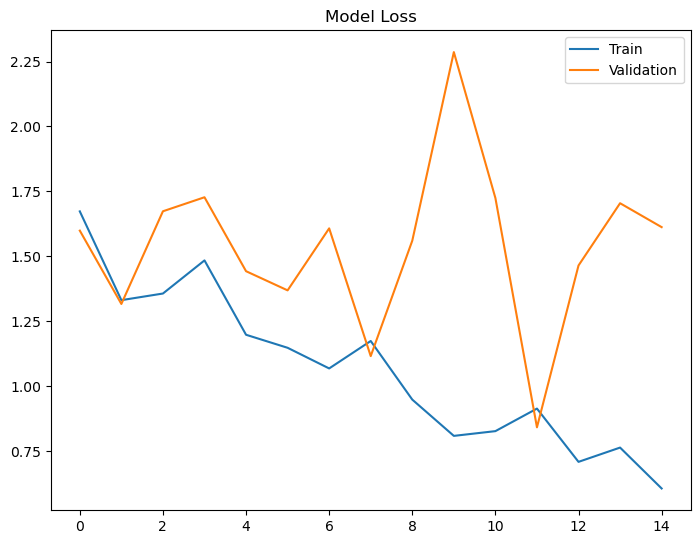

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'], loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=1.0, left=0.0, hspace=0.25, wspace=0.35)

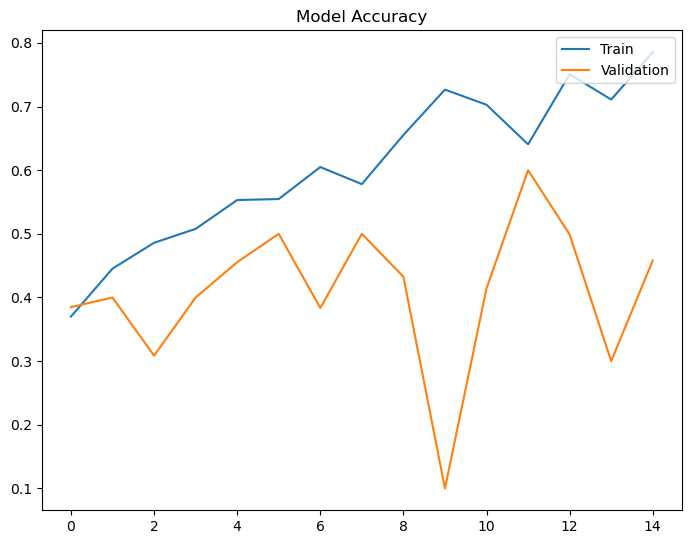

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'], loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=1.0, left=0.0, hspace=0.25, wspace=0.35)

In [13]:
model_json=model.to_json()
with open('model_a.json','w') as json_file:
    json_file.write(model_json)